<a href="https://colab.research.google.com/github/Vigneshwar-KR/Yolov8_01_Object_Detection/blob/main/yolo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Object detection model used YOLOv8**

![YOLOv8 Integrations Banner](https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png)

## Ultralytics YOLOv8 provides these following modes:
1.   Train
2.   Val
3.   Predict
4.   Track
5.   Benchmark

## Ultralytics YOLOv8 supports these following computer vision tasks:
1.   Detection
2.   Segmentation
3.   Classification
4.   Oriented object detection
5.   Keypoints detection

# **Problem task**
Build a object detection model to localize joints, nuts, bolts and other system components. End goal is to classify the parts based on the given label and handled in the coordinate system of the given system. In order to do that first we need to detect the parts and classify them.

For now i have selected **4 basic class labels**:

    ['Bearing', 'Bolt', 'Gear', 'Nut']
and it will be increased after improving the dataset and the model.

I tried using custom dataset which i prepared from my part time as Hiwi. But as the number of sample available was very low. Therefore, I used this as my test dataset for inference. In order to train the model, i used another custom dataset with 2250 images.

The train-val-test split is 1800-225-225.

# **Annotation**

We follow the YOLO format for annotating the labels. This is nothing but a txt file with coordinates for rectangular bounding boxes with class index.

    0 0.49375 0.484375 0.2875 0.4078125

The first index (0) denotes the class of the sample and the rest four denotes the 4 points of bounding box. This is a horizontal bounding box and not a oriented bounding box.


![Bounding boxes](https://github.com/Vigneshwar-KR/Yolov8_01_Object_Detection/blob/main/Horizontal-bounding-box-a-versus-oriented-bounding-box-b-taking-ship-detection-as-an.png?raw=1)


# **YOLO Architecture**

YOLO architecture is similar to GoogleNet. As illustrated below, it has overall 24 convolutional layers, four max-pooling layers, and two fully connected layers.

![YOLO Architecture](https://images.datacamp.com/image/upload/v1664382694/YOLO_Architecture_from_the_original_paper_ff4e5383c0.png)

![YOLOv8 Architecture](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*DeULH1Huz5zkny1aO_WUGQ.png)

( [YOLO Original Paper](https://arxiv.org/pdf/1506.02640) )

https://medium.com/@juanpedro.bc22/detailed-explanation-of-yolov8-architecture-part-1-6da9296b954e
https://www.datacamp.com/blog/yolo-object-detection-explained


Connect to GPU

In [ ]:
!nvidia-smi

Tue May 21 18:58:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0              27W /  70W |    417MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

# **YOLO CLI**
YOLO Command Line Interface can be used to train, validate and run inference on models.
( [YOLO CLI](https://docs.ultralytics.com/usage/cli/#overriding-default-config-file) )



In [ ]:
!yolo predict model=yolov8n.pt source="https://assets-global.website-files.com/646dd1f1a3703e451ba81ecc/649e6bfdd1309eab8b754c38_Image-Powered-1-simple-p-1600.webp"

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 56.4k/56.4k [00:00<00:00, 88.0MB/s]
WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/drive/MyDrive/Yolo_01/649e6bfdd1309eab8b754c38_Image-Powered-1-simple-p-1600.webp: 352x640 2 persons, 235.1ms
Speed: 11.0ms preprocess, 235.1ms inference, 4400.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo predict model=yolov8n.pt source="https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg"


Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 29.6MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/drive/MyDrive/Yolo_01/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 104.6ms
Speed: 4.8ms preprocess, 104.6ms inference, 1409.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pwd

/content/drive/MyDrive/Yolo_01


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source="bicycle.jpeg"

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/drive/MyDrive/Yolo_01/bicycle.jpeg: 448x640 1 bicycle, 117.7ms
Speed: 4.4ms preprocess, 117.7ms inference, 2142.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.predict(source="bicycle.jpeg")


image 1/1 /content/drive/MyDrive/Yolo_01/bicycle.jpeg: 448x640 1 bicycle, 11.6ms
Speed: 3.2ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# **Custom training**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
!pip install IPython
from IPython import display
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Yolo_01

/content/drive/MyDrive/Yolo_01


In [ ]:
!ls

 649e6bfdd1309eab8b754c38_Image-Powered-1-simple-p-1600.webp   data.yaml	   yolo_01.ipynb
 bicycle.jpeg						      'Mechanical Parts'   yolov8n.pt
 bus.jpg						       runs


# Training the model for 25 epochs

In [ ]:
%cd /content/drive/MyDrive/Yolo_01
!yolo task=detect mode=train model=yolov8n.pt data= "/content/drive/MyDrive/Yolo_01/Mechanical Parts/data.yaml" epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/Yolo_01
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Yolo_01/Mechanical Parts/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

Model shows a good level of accuracy, with a high precision and reasonably high recall. The mAP metrics indicate strong performance, particularly at the 0.5 IoU threshold.

# Further steps to improve the model


1.   Fine tuning of learning rate, batch size, preprocessing and other techniques can be introduced.
2.   Run for further epochs



In [ ]:
!ls runs/detect/train6/

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1716318462.357f053e82e8.21750.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1695.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch1696.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch1697.jpg  weights
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg


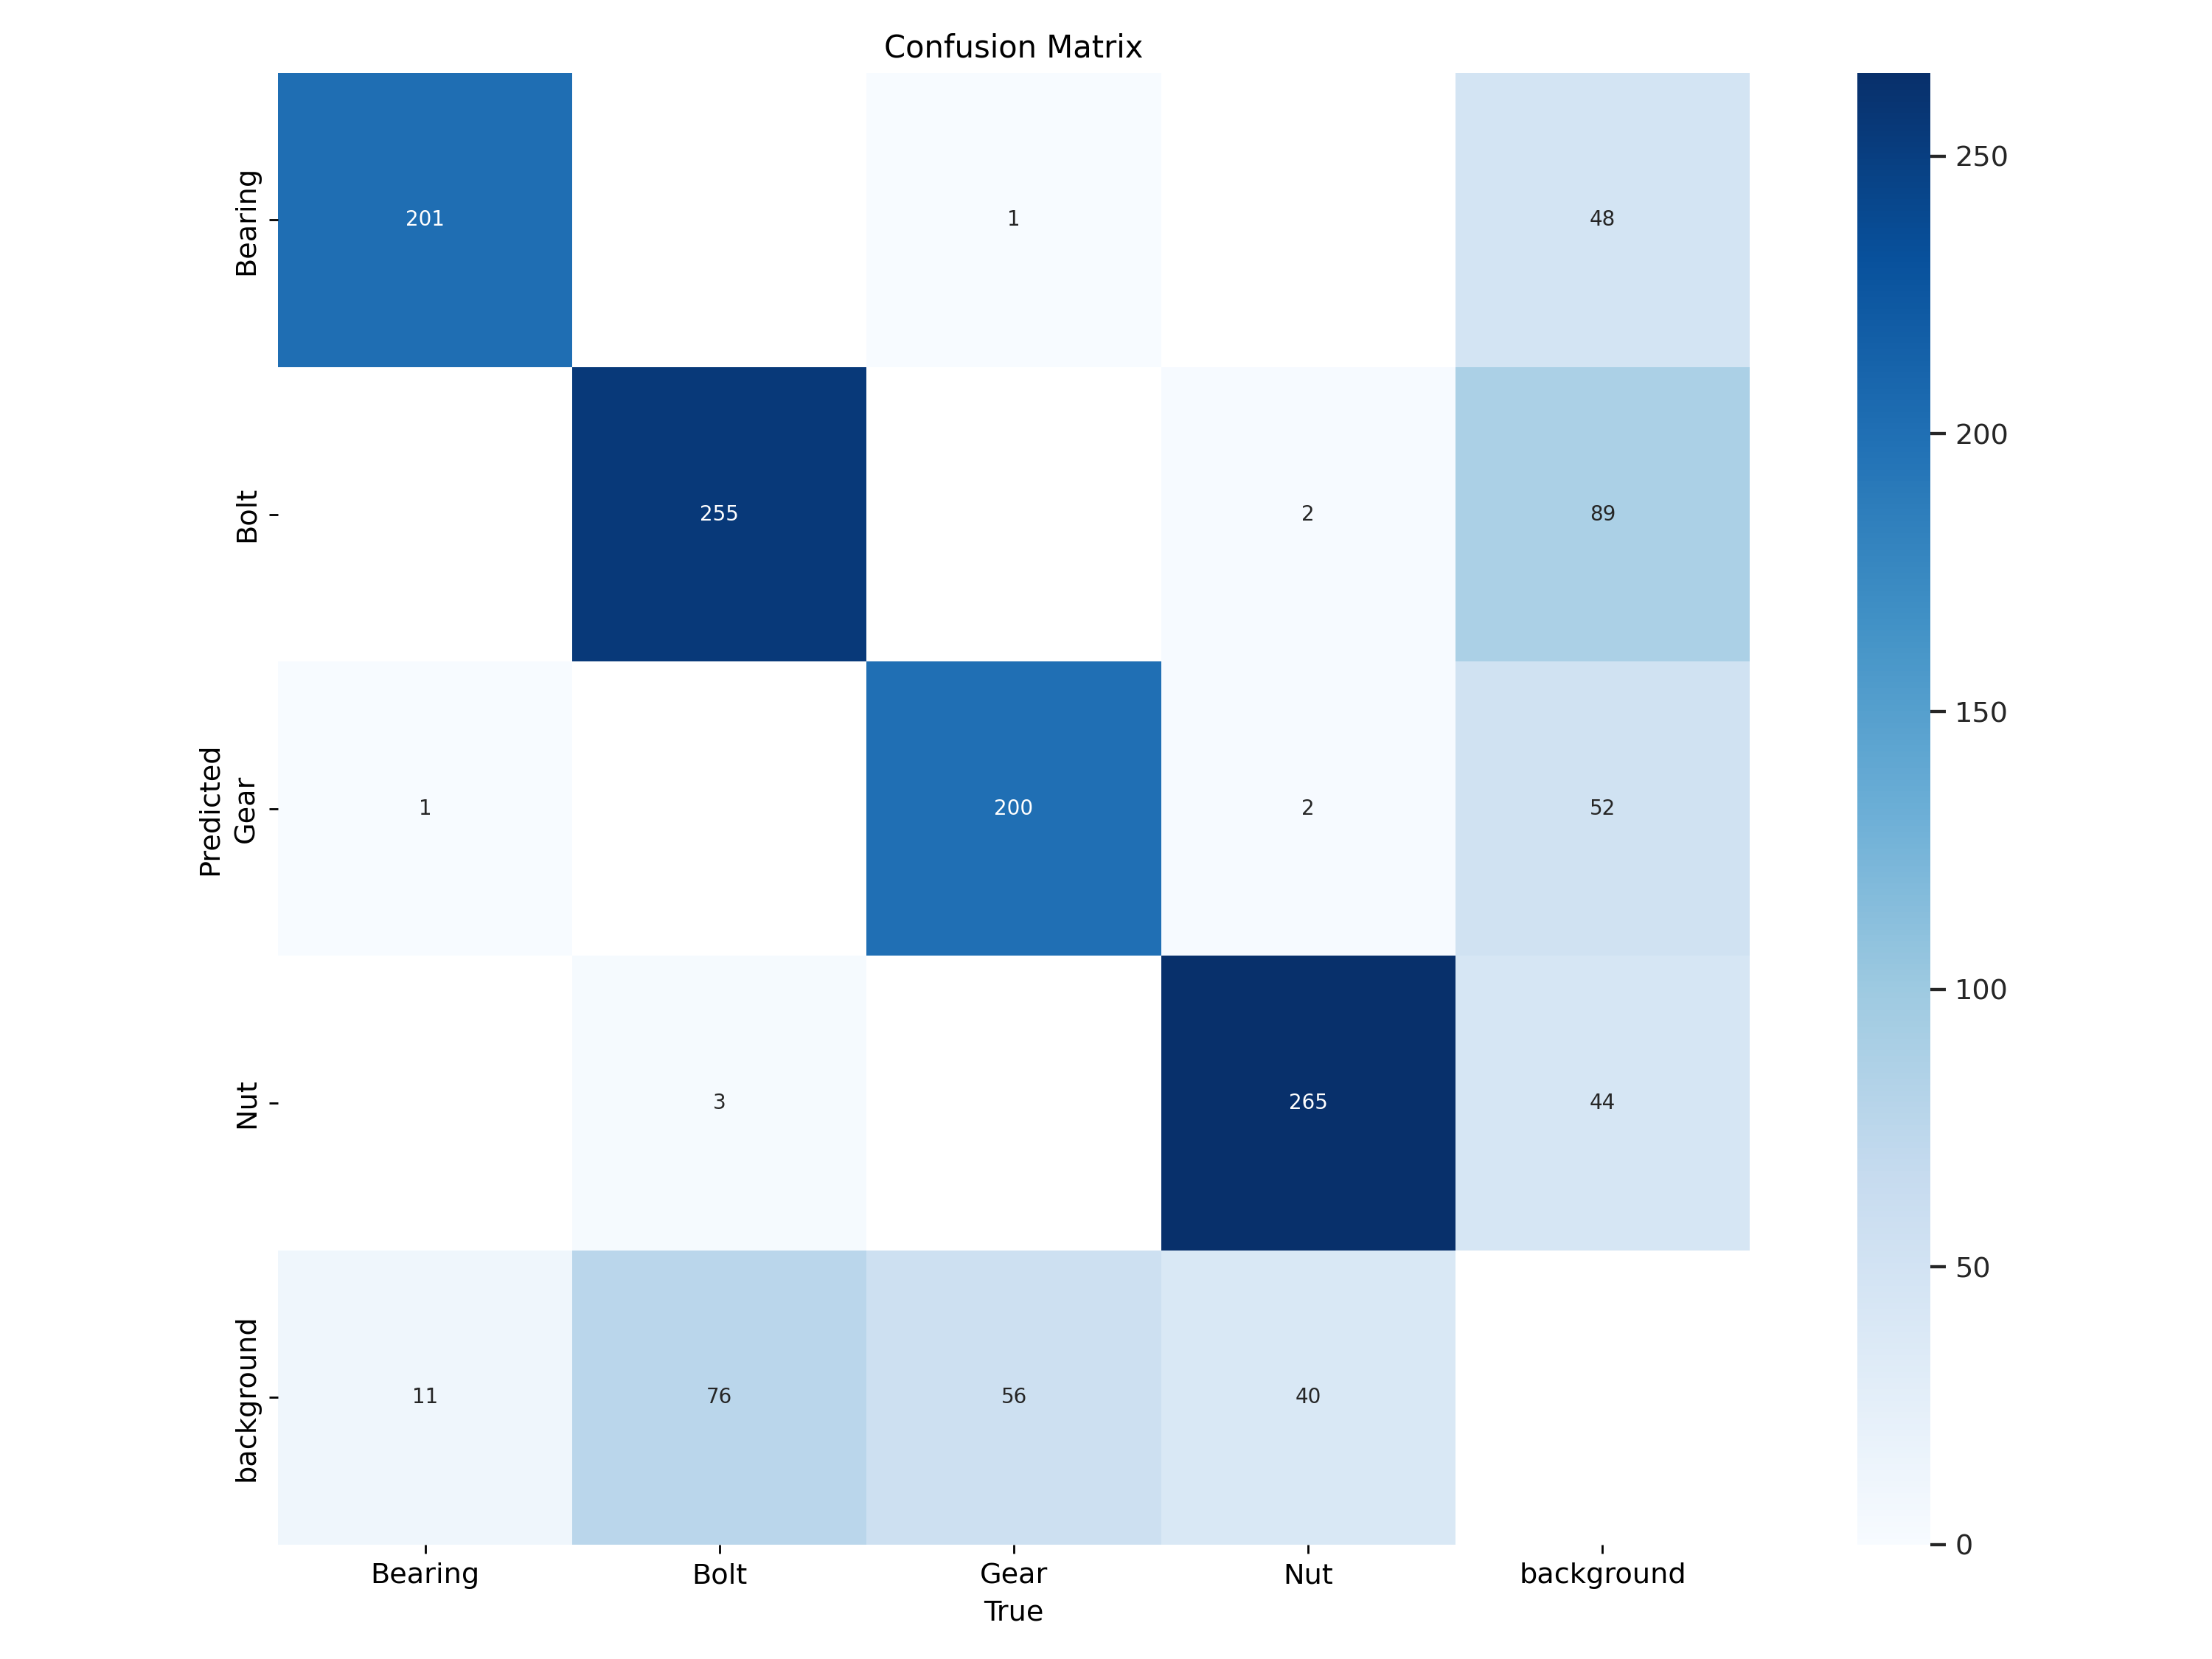

In [ ]:
Image(filename='runs/detect/train6/confusion_matrix.png')

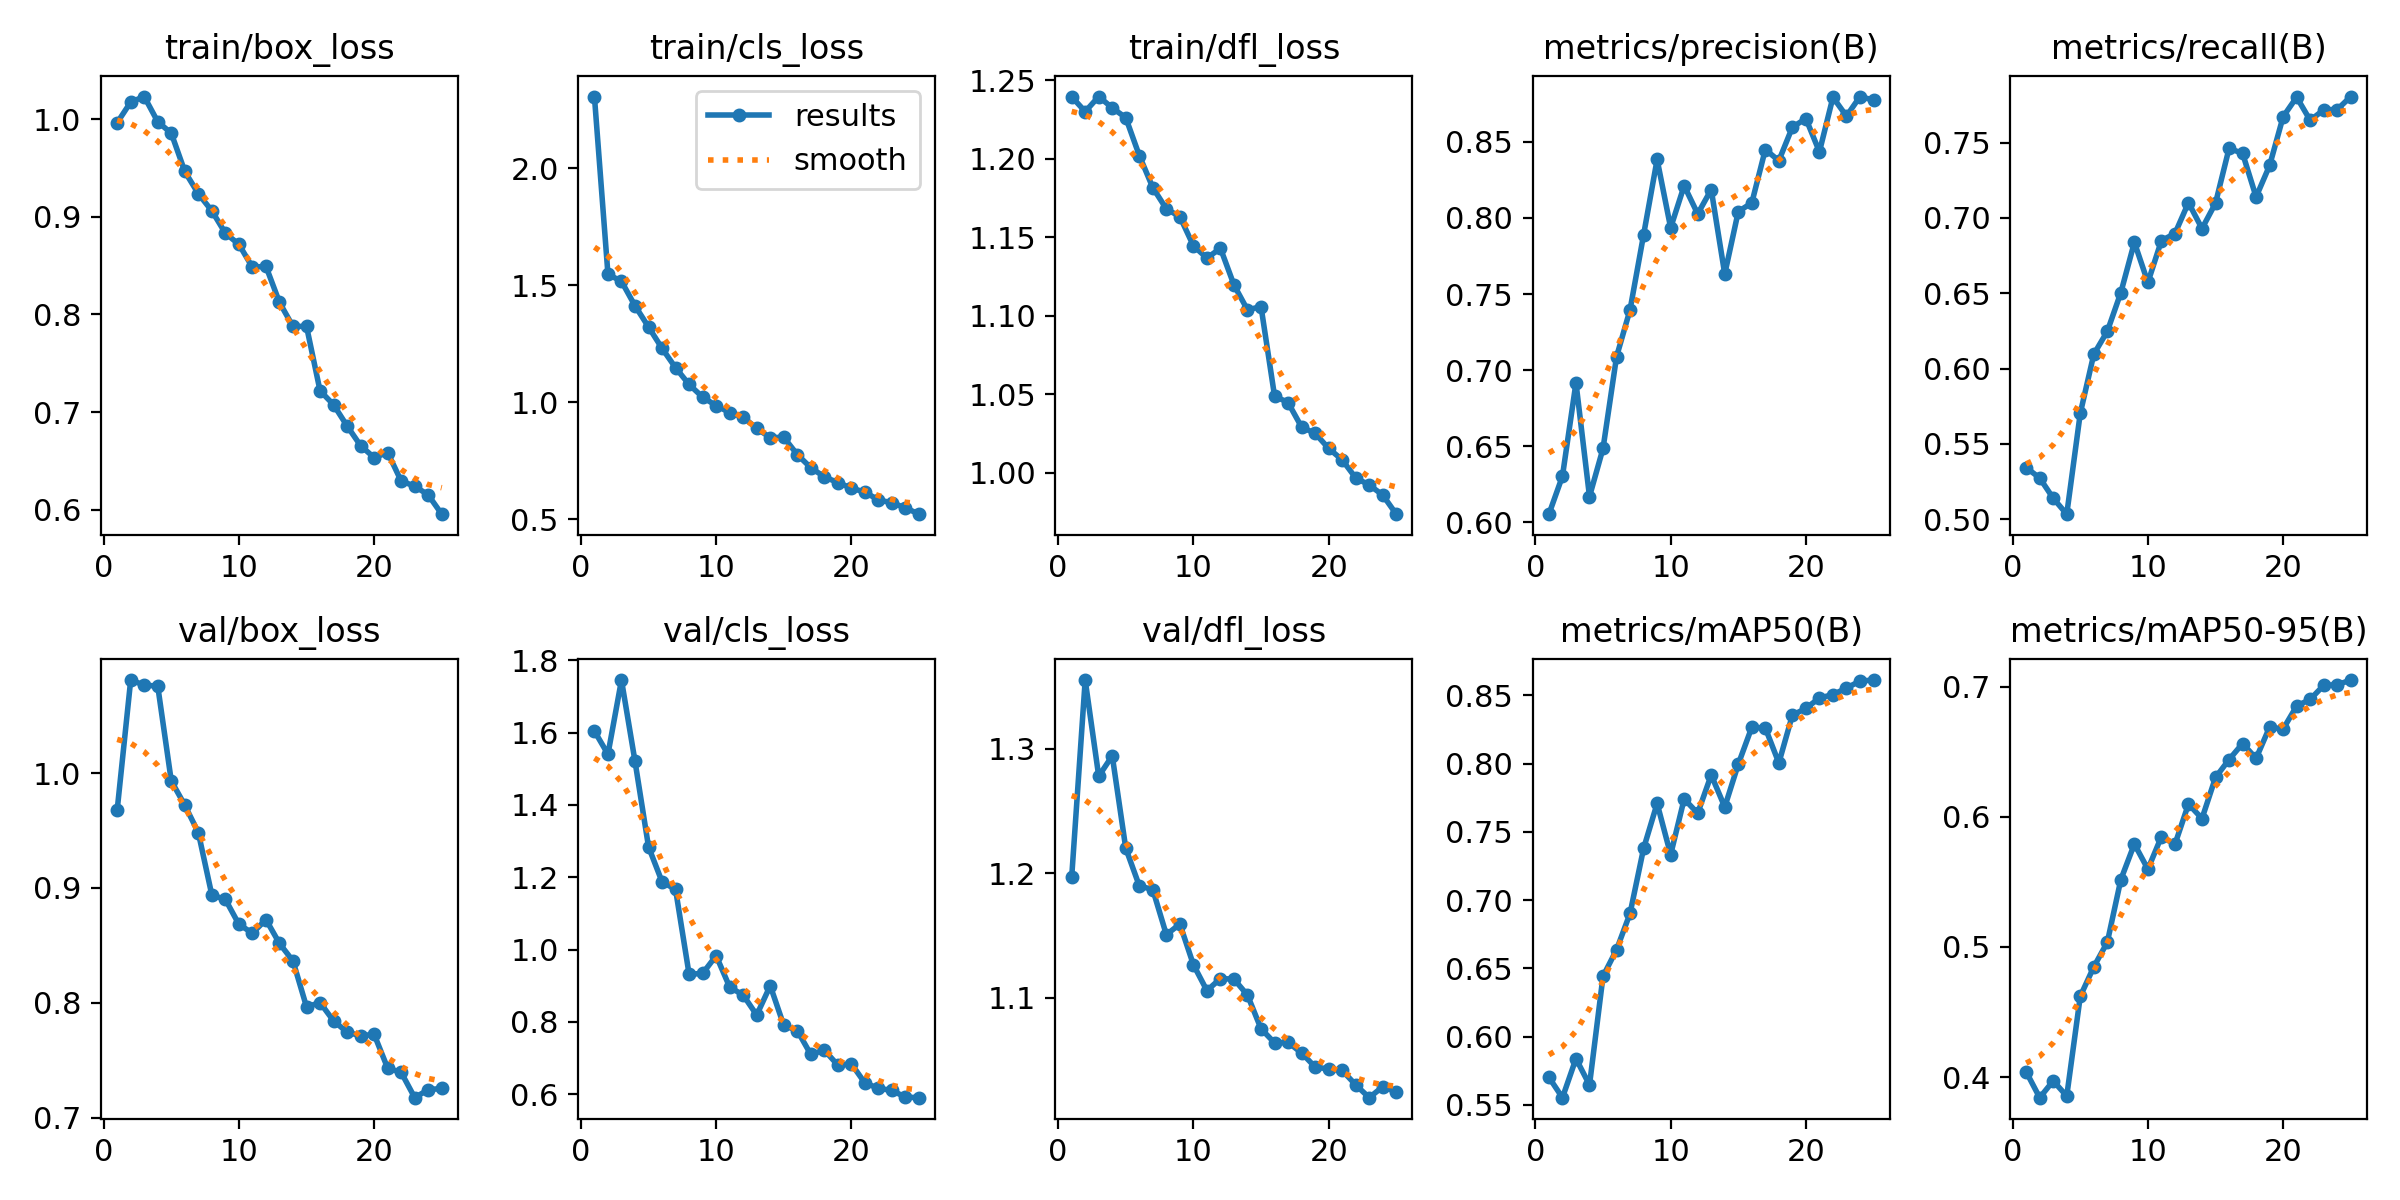

In [ ]:
Image(filename='runs/detect/train6/results.png')

# **Validate custom model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train6/weights/best.pt data='/content/drive/MyDrive/Yolo_01/Mechanical Parts/data.yaml'

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Yolo_01/Mechanical Parts/valid/labels.cache... 225 images, 0 backgrounds, 0 corrupt: 100% 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:11<00:00,  1.33it/s]
                   all        225       1113      0.877      0.781      0.861      0.705
               Bearing        225        213      0.885      0.906      0.937       0.78
                  Bolt        225        334      0.821       0.68      0.764      0.589
                  Gear        225        257      0.868      0.714       0.83      0.667
                   Nut        225        309      0.935      0.825      0.914      0.785
Speed: 2.1ms preprocess, 6.5ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/

# **Inference with trained model**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images"

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/252_jpg.rf.2860da11dfb0f41fb0012f7f49dbe4f4.jpg: 640x640 2 Bolts, 3 Nuts, 7.7ms
image 2/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/288_jpg.rf.2789171d3932854442bdfc457b106853.jpg: 640x640 4 Bolts, 2 Nuts, 8.0ms
image 3/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/2a3e2ym_jpg.rf.a848fcf7a4b6d7531fc2093e79a070c4.jpg: 640x640 3 Bearings, 1 Bolt, 32.1ms
image 4/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/2a8eyp5_jpg.rf.89d37f872438d98f5e1525b027e2fc3a.jpg: 640x640 1 Gear, 7.9ms
image 5/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/2acdw4t_jpg.rf.68c7c6cd4a756b214ceda0055481341b.jpg: 640x640 1 Bearing, 7.3ms
image 6/225 /content/drive/MyDrive/Yolo_01/Mechanical Parts/test/images/

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source="/content/18_Color.png"

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/18_Color.png: 480x640 5 Nuts, 94.4ms
Speed: 2.5ms preprocess, 94.4ms inference, 1624.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source="/content/5_Color.png"

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/5_Color.png: 480x640 2 Gears, 1 Nut, 231.0ms
Speed: 24.9ms preprocess, 231.0ms inference, 3467.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict14
💡 Learn more at https://docs.ultralytics.com/modes/predict


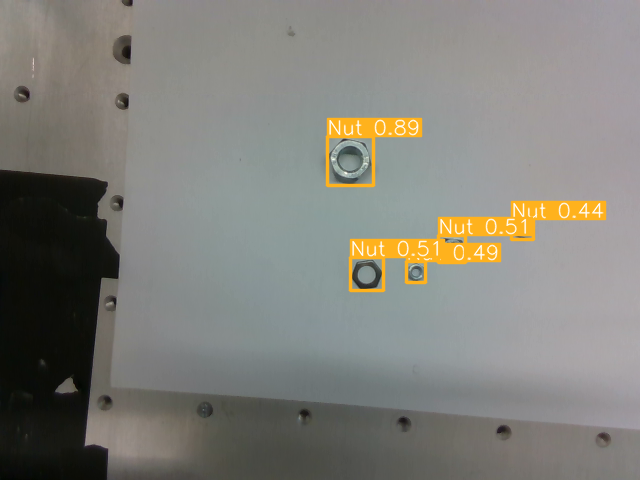

In [ ]:
Image(filename='/content/drive/MyDrive/Yolo_01/runs/detect/predict7/18_Color.png')

I have given the confidence threshold to be 0.25. This is a good starting point for balancing between capturing true detections and minimizing false positives.

In the above prediction, we can see that it generalizes quite well. But we can also say that the model won't generalizes well on complex system because of the nature of input dataset. Therefore in order to generalize well in complex systems, we need to improve our dataset, preprocessing and also the model.





